# Problem: Write a Custom Activation Function

### Problem Statement
You are tasked with implementing a **custom activation function** in PyTorch that computes the following operation: 
 
$ \text{activation}(x) = \tanh(x) + x $ 

Once implemented, this custom activation function will be used in a simple linear regression model.

### Requirements
1. **Custom Activation Function**:
   - Implement a class `CustomActivationModel` inheriting from `torch.nn.Module`.
   - Define the `forward` method to compute the activation function \( \text{tanh}(x) + x \).

2. **Integration with Linear Regression**:
   - Use the custom activation function in a simple linear regression model.
   - The model should include:
     - A single linear layer.
     - The custom activation function applied to the output of the linear layer.

### Constraints
- The custom activation function should not have any learnable parameters.
- Ensure compatibility with PyTorch tensors for forward pass computations.

<details>
  <summary>💡 Hint</summary>
  Some details: https://stackoverflow.com/questions/55765234/pytorch-custom-activation-functions
</details>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

In [2]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2 * X + 3 + torch.randn(100, 1)  # Linear relationship with noise

In [3]:
# Define the Linear Regression Model within a CustomActivationModel class
class CustomActivationModel(nn.Module):
    def __init__(self):
        super(CustomActivationModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single input and single output

    def custom_activation(self, x):
        return torch.tanh(x) + x

    def forward(self, x):
        return self.custom_activation(self.linear(x))

# Initialize the model, loss function, and optimizer
model = CustomActivationModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 1.0552
Epoch [200/1000], Loss: 0.8031
Epoch [300/1000], Loss: 0.7150
Epoch [400/1000], Loss: 0.6826
Epoch [500/1000], Loss: 0.6705
Epoch [600/1000], Loss: 0.6659
Epoch [700/1000], Loss: 0.6642
Epoch [800/1000], Loss: 0.6635
Epoch [900/1000], Loss: 0.6632
Epoch [1000/1000], Loss: 0.6632


Learned weight: 1.9557, Learned bias: 2.2181


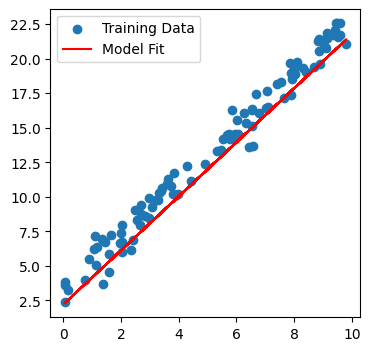

Predictions for [[4.0], [7.0]]: [[11.04088020324707], [16.907970428466797]]


In [4]:
# Display the learned parameters
[w, b] = model.linear.parameters()
print(f"Learned weight: {w.item():.4f}, Learned bias: {b.item():.4f}")

# Plot the model fit to the train data
plt.figure(figsize=(4, 4))
plt.scatter(X, y, label='Training Data')
plt.plot(X, w.item()*X + b.item(), 'r', label='Model Fit')
plt.legend()
plt.show()

# Testing on new data
X_test = torch.tensor([[4.0], [7.0]])
with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for {X_test.tolist()}: {predictions.tolist()}")